<a href="https://colab.research.google.com/github/danilsab24/Semantic_Segmentation_Potsdam/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/danilsab24/Semantic_Segmentation_Potsdam.git

fatal: destination path 'Semantic_Segmentation_Potsdam' already exists and is not an empty directory.


In [2]:
from Semantic_Segmentation_Potsdam.Unet import UNET
from Semantic_Segmentation_Potsdam.dataset import Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
'''
import os

directory_path = "/content/drive/MyDrive"  # Inserisci il percorso della directory
prefix_to_remove = "top_potsdam"          # Prefisso da cercare nei nomi dei file

# Elenco dei file nella directory
file_list = os.listdir(directory_path)

# Itera attraverso i file e elimina quelli che iniziano con il prefisso specificato
for filename in file_list:
    if filename.startswith(prefix_to_remove):
        file_path = os.path.join(directory_path, filename)
        os.remove(file_path)
        print(f"File eliminato: {filename}")

print("Eliminazione completata.")
'''

'\nimport os\n\ndirectory_path = "/content/drive/MyDrive"  # Inserisci il percorso della directory\nprefix_to_remove = "top_potsdam"          # Prefisso da cercare nei nomi dei file\n\n# Elenco dei file nella directory\nfile_list = os.listdir(directory_path)\n\n# Itera attraverso i file e elimina quelli che iniziano con il prefisso specificato\nfor filename in file_list:\n    if filename.startswith(prefix_to_remove):\n        file_path = os.path.join(directory_path, filename)\n        os.remove(file_path)\n        print(f"File eliminato: {filename}")\n\nprint("Eliminazione completata.")\n'

In [5]:
# Librerie per il Dataset
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from albumentations import Compose, RandomCrop, HorizontalFlip, Normalize

# Visualizzazione delle immagini
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid
import torchvision.transforms.functional as F
from PIL import Image
import os
import cv2

In [5]:
images_path = "/content/drive/MyDrive/Semantic_Segmentation_Postdam/images_IRRG"
labels_path = "/content/drive/MyDrive/Semantic_Segmentation_Postdam/labels"

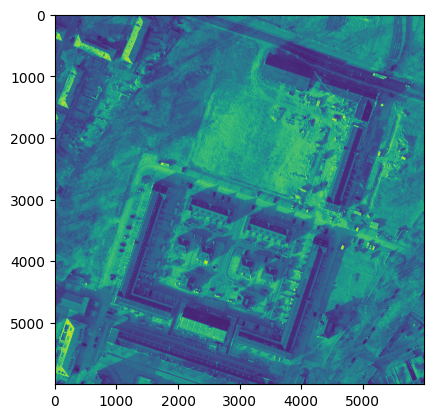

In [7]:
#Quick understanding of the dataset
temp_img = cv2.imread("/content/drive/MyDrive/Semantic_Segmentation_Postdam/images_IRRG/top_potsdam_2_10_IRRG.tif") #3 channels / spectral bands
plt.imshow(temp_img[:,:,2]) #View each channel...

In [ ]:
# Load the label image
temp_mask = cv2.imread("/content/drive/MyDrive/Semantic_Segmentation_Postdam/labels/top_potsdam_2_10_label.tif")

# Define the class mapping
class_mapping = {
    (255, 255, 255): 0,  # Impervious surfaces
    (0, 0, 255): 1,      # Building
    (0, 255, 255): 2,    # Low vegetation
    (0, 255, 0): 3,      # Tree
    (255, 255, 0): 4,    # Car
    (255, 0, 0): 5      # Clutter/background
}

# Initialize an array to hold the counts for each class
class_counts = np.zeros(len(class_mapping), dtype=int)

# Loop through the pixels and count occurrences of each class
for rgb, class_idx in class_mapping.items():
    mask = np.all(temp_mask == np.array(rgb), axis=-1)
    class_counts[class_idx] = np.sum(mask)

# Print the class labels and their respective counts
for class_idx, count in enumerate(class_counts):
    class_label = next(key for key, value in class_mapping.items() if value == class_idx)
    print("Class {}: {} - Count: {}".format(class_idx, class_label, count))

Class 0: (255, 255, 255) - Count: 7433797
Class 1: (0, 0, 255) - Count: 4944599
Class 2: (0, 255, 255) - Count: 313148
Class 3: (0, 255, 0) - Count: 2679388
Class 4: (255, 255, 0) - Count: 15182061
Class 5: (255, 0, 0) - Count: 5447007


In [ ]:
def print_image_shapes(path):
    for filename in os.listdir(path):
        if filename.endswith(".tif") or filename.endswith(".png"):
            image_path = os.path.join(path, filename)
            image = Image.open(image_path)
            print(f"Image: {filename}, Shape: {image.size}")

print("Image shapes in 'images_IRRG' folder:")
print_image_shapes(images_path)

print("\nImage shapes in 'labels' folder:")
print_image_shapes(labels_path)

Image shapes in 'images_IRRG' folder:
Image: top_potsdam_2_10_IRRG.tif, Shape: (6000, 6000)
Image: top_potsdam_2_11_IRRG.tif, Shape: (6000, 6000)
Image: top_potsdam_2_12_IRRG.tif, Shape: (6000, 6000)
Image: top_potsdam_2_13_IRRG.tif, Shape: (6000, 6000)
Image: top_potsdam_2_14_IRRG.tif, Shape: (6000, 6000)
Image: top_potsdam_3_10_IRRG.tif, Shape: (6000, 6000)
Image: top_potsdam_3_11_IRRG.tif, Shape: (6000, 6000)
Image: top_potsdam_3_12_IRRG.tif, Shape: (6000, 6000)
Image: top_potsdam_3_13_IRRG.tif, Shape: (6000, 6000)
Image: top_potsdam_3_14_IRRG.tif, Shape: (6000, 6000)
Image: top_potsdam_4_10_IRRG.tif, Shape: (6000, 6000)
Image: top_potsdam_4_11_IRRG.tif, Shape: (6000, 6000)
Image: top_potsdam_4_12_IRRG.tif, Shape: (6000, 6000)
Image: top_potsdam_4_13_IRRG.tif, Shape: (6000, 6000)
Image: top_potsdam_4_14_IRRG.tif, Shape: (6000, 6000)
Image: top_potsdam_4_15_IRRG.tif, Shape: (6000, 6000)
Image: top_potsdam_5_10_IRRG.tif, Shape: (6000, 6000)
Image: top_potsdam_5_11_IRRG.tif, Shape: (60

In [6]:
from PIL import Image
import os

# Percorso delle immagini originali e destinazione delle patch
original_images_path = "/content/drive/MyDrive/Semantic_Segmentation_Postdam/images_IRRG"
patch_images_save_path = "/content/"
patch_folder_name = "images_patches"

# Dimensioni delle patch desiderate
patch_size = 250  # Dimensione delle patch, puoi regolarla in base alle tue esigenze

# Crea la cartella per le patch se non esiste
patch_folder_path = os.path.join(patch_images_save_path, patch_folder_name)
if not os.path.exists(patch_folder_path):
    os.mkdir(patch_folder_path)

# Ciclo attraverso le immagini originali
for image_filename in os.listdir(original_images_path):
  if image_filename.endswith(".tif"):
      image_path = os.path.join(original_images_path, image_filename)

      # Carica l'immagine
      image = Image.open(image_path)

      # Estrai le patch dall'immagine
      num_patches = (image.width // patch_size) * (image.height // patch_size)
      for i in range(0, image.width, patch_size):
          for j in range(0, image.height, patch_size):
              patch = image.crop((i, j, i + patch_size, j + patch_size))
              patch_filename = f"{os.path.splitext(image_filename)[0]}_patch_{i}_{j}.tif"   # Genera un nome univoco per ogni patch
              patch_save_location = os.path.join(patch_folder_path, patch_filename)

              # Controlla se la patch esiste già
              if not os.path.exists(patch_save_location):
                  patch.save(patch_save_location)

print("Riduzione delle immagini in patch completata.")


KeyboardInterrupt: ignored

In [7]:
import os

# Percorso della cartella delle patch
patch_folder_path = "/content/images_patches"

# Contatore per le immagini
image_count = 0

# Ciclo attraverso i file nella cartella delle patch
for filename in os.listdir(patch_folder_path):
    if filename.endswith(".tif"):
        image_count += 1

print(f"Numero totale di immagini nella cartella delle patch: {image_count}")

Numero totale di immagini nella cartella delle patch: 21888


In [ ]:
# Percorso delle immagini originali e destinazione delle patch
original_images_path = "/content/drive/MyDrive/Semantic_Segmentation_Postdam/labels"
patch_Labels_save_path = "/content/"
patch_folder_name = "labels_patches"

# Dimensioni delle patch desiderate
patch_size = 250  # Dimensione delle patch, puoi regolarla in base alle tue esigenze

# Crea la cartella per le patch se non esiste
patch_folder_path = os.path.join(patch_Labels_save_path, patch_folder_name)
if not os.path.exists(patch_folder_path):
    os.mkdir(patch_folder_path)


# Ciclo attraverso le immagini originali
for image_filename in os.listdir(original_images_path):
    if image_filename.endswith(".tif"):
        image_path = os.path.join(original_images_path, image_filename)

        # Carica l'immagine
        image = Image.open(image_path)

        # Estrai le patch dall'immagine
        num_patches = (image.width // patch_size) * (image.height // patch_size)
        for i in range(0, image.width, patch_size):
            for j in range(0, image.height, patch_size):
                patch = image.crop((i, j, i + patch_size, j + patch_size))
                patch_filename = f"{os.path.splitext(image_filename)[0]}_patch_{i}_{j}.tif"   # Genera un nome univoco per ogni patch
                patch_save_location = os.path.join(patch_folder_path, patch_filename)

                # Controlla se la patch esiste già
                if not os.path.exists(patch_save_location):
                    patch.save(patch_save_location)

print("Riduzione delle immagini in patch completata.")

In [8]:
# Percorso della cartella delle patch
patch_folder_path = "/content/labels_patches"

# Contatore per le immagini
image_count = 0

# Ciclo attraverso i file nella cartella delle patch
for filename in os.listdir(patch_folder_path):
    if filename.endswith(".tif"):
        image_count += 1

print(f"Numero totale di immagini nella cartella delle patch: {image_count}")

Numero totale di immagini nella cartella delle patch: 21888


In [ ]:
'''
import os

# Percorso della cartella contenente le immagini
images_folder_path = "/content"

# Ciclo attraverso i file nella cartella
for filename in os.listdir(images_folder_path):
    if filename.startswith("top_potsdam") and filename.endswith(".tif"):
        file_path = os.path.join(images_folder_path, filename)
        os.remove(file_path)
        print(f"File eliminato: {filename}")

print("Eliminazione completata.")
'''

In [24]:
import os

def rename_files_in_folder(folder_path, old_substring, new_substring):
    for filename in os.listdir(folder_path):
        if old_substring in filename:
            new_filename = filename.replace(old_substring, new_substring)
            old_file_path = os.path.join(folder_path, filename)
            new_file_path = os.path.join(folder_path, new_filename)
            os.rename(old_file_path, new_file_path)
            print(f"File rinominato: {filename} -> {new_filename}")

# Cartella delle immagini non segmentate
data_folder = "/content/images_patches"
rename_files_in_folder(data_folder, "_IRRG", "")

# Cartella delle immagini segmentate
target_folder = "/content/labels_patches"
rename_files_in_folder(target_folder, "_label", "")

print("Rinomina completata.")

Output streaming troncato alle ultime 5000 righe.
File rinominato: top_potsdam_7_11_label_patch_1000_3750.tif -> top_potsdam_7_11_patch_1000_3750.tif
File rinominato: top_potsdam_6_13_label_patch_4500_2000.tif -> top_potsdam_6_13_patch_4500_2000.tif
File rinominato: top_potsdam_3_10_label_patch_500_1000.tif -> top_potsdam_3_10_patch_500_1000.tif
File rinominato: top_potsdam_7_10_label_patch_1500_2250.tif -> top_potsdam_7_10_patch_1500_2250.tif
File rinominato: top_potsdam_5_14_label_patch_500_4750.tif -> top_potsdam_5_14_patch_500_4750.tif
File rinominato: top_potsdam_7_9_label_patch_3000_4250.tif -> top_potsdam_7_9_patch_3000_4250.tif
File rinominato: top_potsdam_7_11_label_patch_250_5750.tif -> top_potsdam_7_11_patch_250_5750.tif
File rinominato: top_potsdam_3_13_label_patch_1500_3750.tif -> top_potsdam_3_13_patch_1500_3750.tif
File rinominato: top_potsdam_6_13_label_patch_4500_3250.tif -> top_potsdam_6_13_patch_4500_3250.tif
File rinominato: top_potsdam_2_14_label_patch_2500_3000.ti

In [23]:
# Definizione delle cartelle
images_folder = '/content/images_patches'
labels_folder = '/content/labels_patches'

# Ottieni la lista dei file nelle cartelle
images_files = os.listdir(images_folder)
labels_files = os.listdir(labels_folder)

# Ordina i file in modo crescente
images_files.sort()
labels_files.sort()

# Stampa i nomi dei file ordinati
print("Contenuti della cartella images_patches (in ordine crescente):")
for filename in images_files:
    print(filename)

print("\nContenuti della cartella labels_patches (in ordine crescente):")
for filename in labels_files:
    print(filename)

Output streaming troncato alle ultime 5000 righe.
top_potsdam_5_15_IRRG_patch_2750_3750.tif
top_potsdam_5_15_IRRG_patch_2750_4000.tif
top_potsdam_5_15_IRRG_patch_2750_4250.tif
top_potsdam_5_15_IRRG_patch_2750_4500.tif
top_potsdam_5_15_IRRG_patch_2750_4750.tif
top_potsdam_5_15_IRRG_patch_2750_500.tif
top_potsdam_5_15_IRRG_patch_2750_5000.tif
top_potsdam_5_15_IRRG_patch_2750_5250.tif
top_potsdam_5_15_IRRG_patch_2750_5500.tif
top_potsdam_5_15_IRRG_patch_2750_5750.tif
top_potsdam_5_15_IRRG_patch_2750_750.tif
top_potsdam_5_15_IRRG_patch_3000_0.tif
top_potsdam_5_15_IRRG_patch_3000_1000.tif
top_potsdam_5_15_IRRG_patch_3000_1250.tif
top_potsdam_5_15_IRRG_patch_3000_1500.tif
top_potsdam_5_15_IRRG_patch_3000_1750.tif
top_potsdam_5_15_IRRG_patch_3000_2000.tif
top_potsdam_5_15_IRRG_patch_3000_2250.tif
top_potsdam_5_15_IRRG_patch_3000_250.tif
top_potsdam_5_15_IRRG_patch_3000_2500.tif
top_potsdam_5_15_IRRG_patch_3000_2750.tif
top_potsdam_5_15_IRRG_patch_3000_3000.tif
top_potsdam_5_15_IRRG_patch_3000

KeyboardInterrupt: ignored

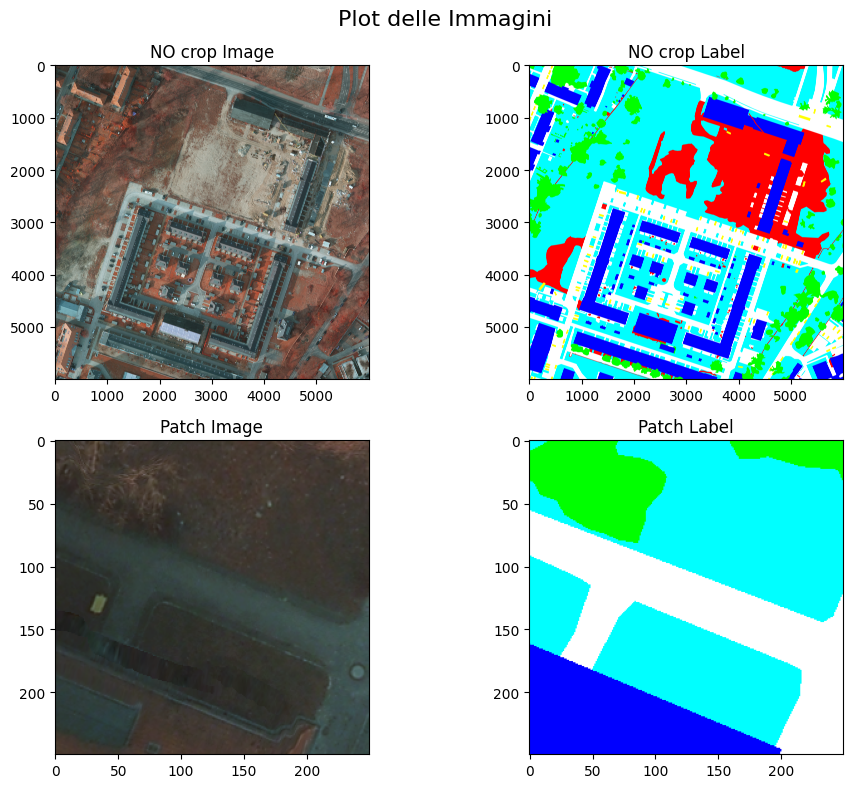

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

# Percorsi delle immagini
image_paths = [
    "/content/drive/MyDrive/Semantic_Segmentation_Postdam/images_IRRG/top_potsdam_2_10_IRRG.tif",
    "/content/drive/MyDrive/Semantic_Segmentation_Postdam/labels/top_potsdam_2_10_label.tif",
    "/content/images_patches/top_potsdam_2_10_IRRG_patch_0_0.tif",
    "/content/labels_patches/top_potsdam_2_10_label_patch_0_0.tif"
]

# Titoli per le immagini
image_titles = [
    "NO crop Image",
    "NO crop Label",
    "Patch Image",
    "Patch Label"
]

# Creazione di una griglia 2x2 per il plot
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Plot delle Immagini", fontsize=16)

for i in range(4):
    row = i // 2
    col = i % 2

    # Caricamento e visualizzazione dell'immagine
    image = Image.open(image_paths[i])
    axes[row, col].imshow(image)
    axes[row, col].set_title(image_titles[i])
    axes[row, col].axis('on')

plt.tight_layout()
plt.show()


In [ ]:
def print_image_shapes(path):
    for filename in os.listdir(path):
        if filename.endswith(".tif") or filename.endswith(".jpg"):
            image_path = os.path.join(path, filename)
            image = Image.open(image_path)
            print(f"Image: {filename}, Shape: {image.size}")

print("Patch shapes in 'images_IRRG' folder:")
print_image_shapes(patch_Images_save_path)

print("\nPatch shapes in 'labels' folder:")
print_image_shapes(patch_Labels_save_path)

In [14]:
data_transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
])
train_transform = Compose([
    RandomCrop(height=256, width=256),  # Esempio di data augmentation: ritaglio casuale
    HorizontalFlip(p=0.5),  # Esempio di data augmentation: flip orizzontale
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalizzazione
])

# Trasformazione per il test (solo normalizzazione)
test_transform = transforms.Compose([
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalizzazione
])

In [27]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, data_root, target_root, transform=None):
        self.data_root = data_root
        self.target_root = target_root
        self.transform = transform
        self.data_filenames = os.listdir(data_root)
        self.data_filenames.sort()  # Ordina i nomi dei file

    def __len__(self):
        return len(self.data_filenames)

    def __getitem__(self, idx):
        data_filename = self.data_filenames[idx].replace("_IRRG", "")  # Rimuovi "_IRRG" dal nome del file
        target_filename = data_filename.replace("_label", "")
        data_path = os.path.join(self.data_root, self.data_filenames[idx])
        target_path = os.path.join(self.target_root, self.data_filenames[idx])

        data_image = Image.open(data_path).convert('RGB')
        target_image = Image.open(target_path).convert('RGB')  # Keep as RGB for multi-class

        if self.transform:
            data_image = self.transform(data_image)
            target_image = self.transform(target_image)

        return data_image, target_image

# Esempio di utilizzo
data_folder = "/content/images_patches"
target_folder = "/content/labels_patches"

custom_dataset = CustomDataset(data_folder, target_folder, transform=transforms.ToTensor())

# Creazione dei DataLoader per training, validazione e test
batch_size = 32
train_loader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)

In [26]:
for data, target in train_loader:
    num_data = data.size(0)  # Numero di campioni nel batch

    # Conta quante coppie immagine segmentata e non segmentata sono presenti nel batch
    count_data = sum("_IRRG" in filename for filename in custom_dataset.data_filenames)

    if num_data != count_data:
        print(f"Il batch contiene {num_data} campioni, ma ci sono {count_data} coppie di immagine segmentata e non segmentata nel dataset.")
    else:
        print("Tutte le coppie di immagini sono presenti nel batch.")
        break  # Esci dal loop una volta verificato il primo batch

Il batch contiene 32 campioni, ma ci sono 0 coppie di immagine segmentata e non segmentata nel dataset.
Il batch contiene 32 campioni, ma ci sono 0 coppie di immagine segmentata e non segmentata nel dataset.
Il batch contiene 32 campioni, ma ci sono 0 coppie di immagine segmentata e non segmentata nel dataset.
Il batch contiene 32 campioni, ma ci sono 0 coppie di immagine segmentata e non segmentata nel dataset.
Il batch contiene 32 campioni, ma ci sono 0 coppie di immagine segmentata e non segmentata nel dataset.
Il batch contiene 32 campioni, ma ci sono 0 coppie di immagine segmentata e non segmentata nel dataset.
Il batch contiene 32 campioni, ma ci sono 0 coppie di immagine segmentata e non segmentata nel dataset.
Il batch contiene 32 campioni, ma ci sono 0 coppie di immagine segmentata e non segmentata nel dataset.
Il batch contiene 32 campioni, ma ci sono 0 coppie di immagine segmentata e non segmentata nel dataset.
Il batch contiene 32 campioni, ma ci sono 0 coppie di immagine s

KeyboardInterrupt: ignored

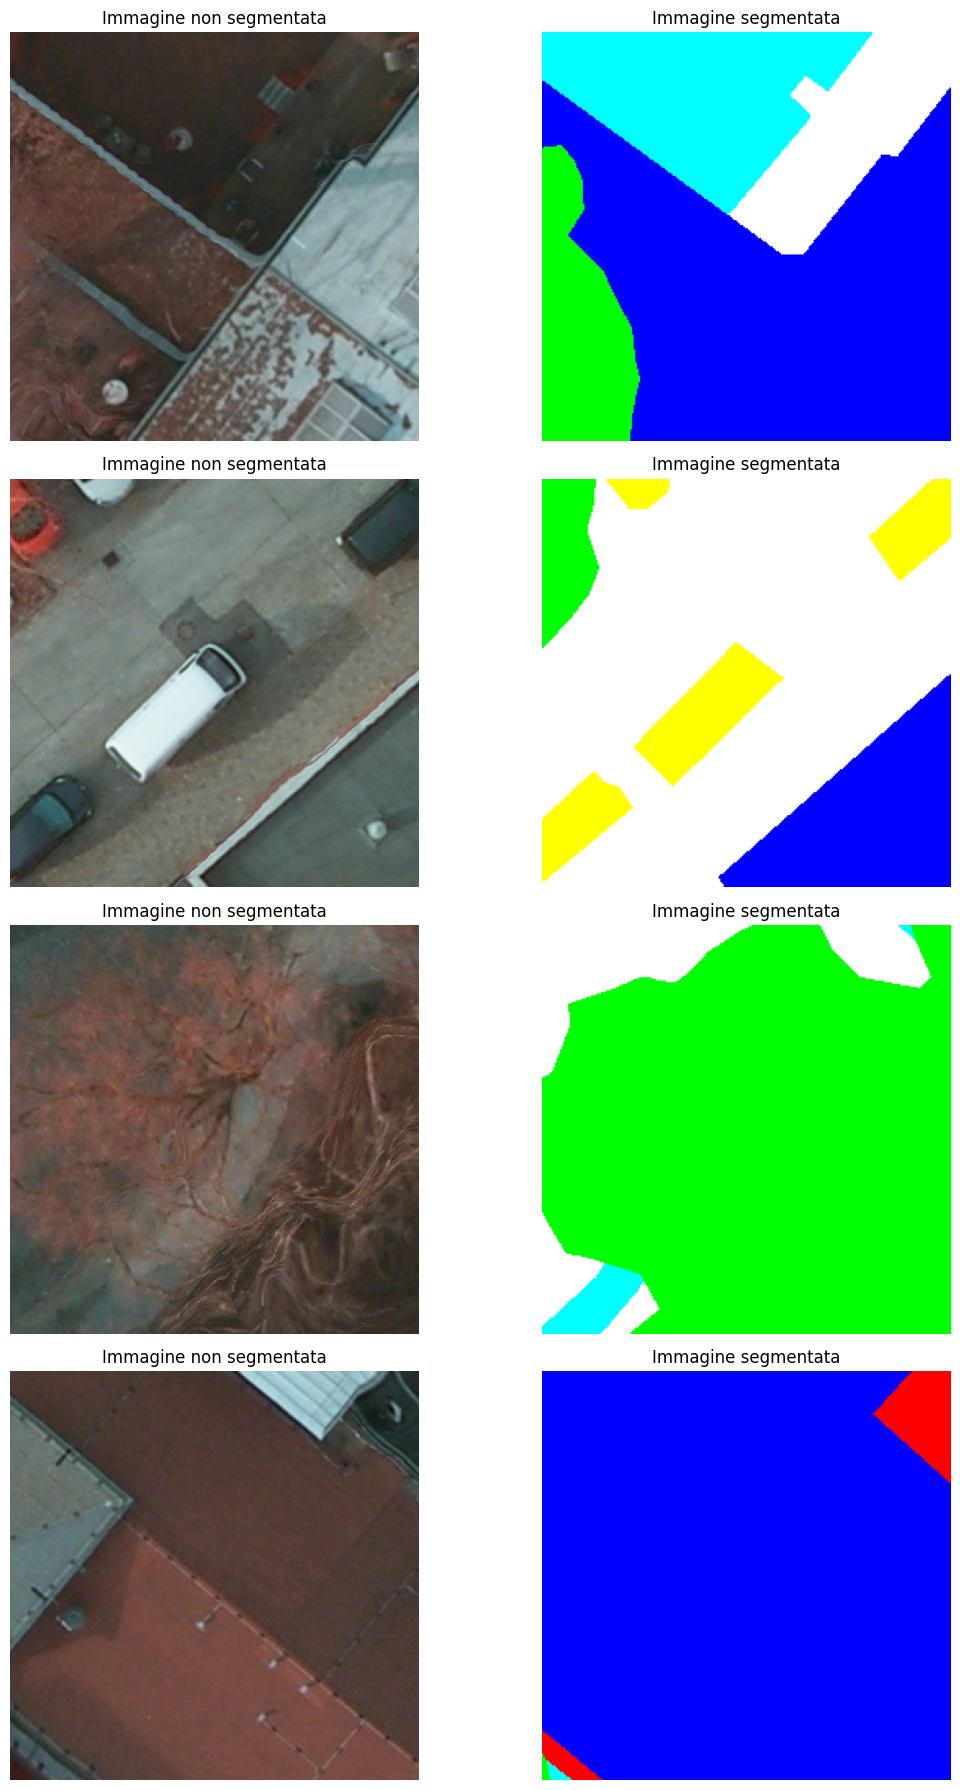

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Ottieni un batch dal train_loader
dataiter = iter(train_loader)
data_batch, target_batch = next(dataiter)

# Prendi le prime 4 immagini dal batch
data_batch = data_batch[:4]
target_batch = target_batch[:4]

# Visualizza le immagini
fig, axes = plt.subplots(4, 2, figsize=(12, 18))

for i in range(4):
    data_img = np.transpose(data_batch[i].numpy(), (1, 2, 0))
    target_img = np.transpose(target_batch[i].numpy(), (1, 2, 0))

    axes[i, 0].imshow(data_img)
    axes[i, 0].set_title("Immagine non segmentata")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(target_img)
    axes[i, 1].set_title("Immagine segmentata")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

In [15]:
patch_Images_save_path = "/content/images_patches"
patch_Labels_save_path = "/content/labels_patches"
# Creazione del dataset
dataset = Data(patch_Images_save_path, patch_Labels_save_path, transform=data_transform)

# Divisione dei dati in train, validation e test set
val_split = 0.1
test_split = 0.1
dataset_size = len(dataset)
val_size = int(val_split * dataset_size)
test_size = int(test_split * dataset_size)
train_size = dataset_size - val_size - test_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Applica le trasformazioni al trainset e al testset
train_dataset.transform = train_transform
val_dataset.transform = train_transform
test_dataset.transform = test_transform

# Creazione dei DataLoader
batch_size = 5  # Definisci la dimensione del batch desiderata

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=False)

AttributeError: ignored

In [9]:
# Stampa delle dimensioni dei dataset
print(f"Dataset size: {len(dataset)} samples")
print(f"Train dataset size: {len(train_dataset)} samples")
print(f"Validation dataset size: {len(val_dataset)} samples")
print(f"Test dataset size: {len(test_dataset)} samples")

Dataset size: 21888 samples
Train dataset size: 17512 samples
Validation dataset size: 2188 samples
Test dataset size: 2188 samples


In [29]:
import os

image_folder = "/content/images_patches"
label_folder = "/content/labels_patches"

patch_size = 250  # Dimensione delle patch

for i in range(0, image.width, patch_size):
    for j in range(0, image.height, patch_size):
        image_patch_filename = f"top_potsdam_2_10_IRRG_patch_{i}_{j}.tif"
        label_patch_filename = f"top_potsdam_2_10_label_patch_{i}_{j}.tif"

        image_patch_path = os.path.join(image_folder, image_patch_filename)
        label_patch_path = os.path.join(label_folder, label_patch_filename)

        if os.path.exists(image_patch_path) and os.path.exists(label_patch_path):
            print(f"{image_patch_filename} e {label_patch_filename} corrispondono.")
        elif os.path.exists(image_patch_path):
            print(f"{image_patch_filename} presente, ma manca {label_patch_filename}.")
        elif os.path.exists(label_patch_path):
            print(f"{label_patch_filename} presente, ma manca {image_patch_filename}.")
        else:
            print(f"{image_patch_filename} coppia non presente.")

top_potsdam_2_10_IRRG_patch_0_0.tif e top_potsdam_2_10_label_patch_0_0.tif corrispondono.


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as vutils
import albumentations as A

def plot_images_from_loader(loader, num_images=4):
    data_iter = iter(loader)
    images, labels = next(data_iter)

    data_iter = iter(loader)
    images, labels = next(data_iter)

    # Inizializza l'augmenter per l'inversione della normalizzazione
    inv_normalize = A.Compose([A.Normalize(mean=[0, 0, 0], std=[1/0.5, 1/0.5, 1/0.5]),
                               A.Normalize(mean=[-0.5, -0.5, -0.5], std=[1, 1, 1])])

    # Inverte la normalizzazione delle immagini
    images = inv_normalize(image=images.numpy())['image']
    print(np.shape(images))

    # Trasponi i canali delle immagini se necessario (da CxHxW a HxWxC)
    images = np.transpose(images, (1, 2, 0))

    # Mostra le immagini
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.show()

# Utilizzo della funzione per plottare le immagini dal train loader
plot_images_from_loader(train_loader, num_images=4)


FileNotFoundError: ignored

In [25]:
import os

file_path = "/content/labels_patches/top_potsdam_3_11_IRRG_patch_1500_1500.tif"

if os.path.exists(file_path):
    print(f"Il file {file_path} esiste.")
else:
    print(f"Il file {file_path} non esiste.")


Il file /content/labels_patches/top_potsdam_3_11_IRRG_patch_1500_1500.tif non esiste.


TypeError: ignored

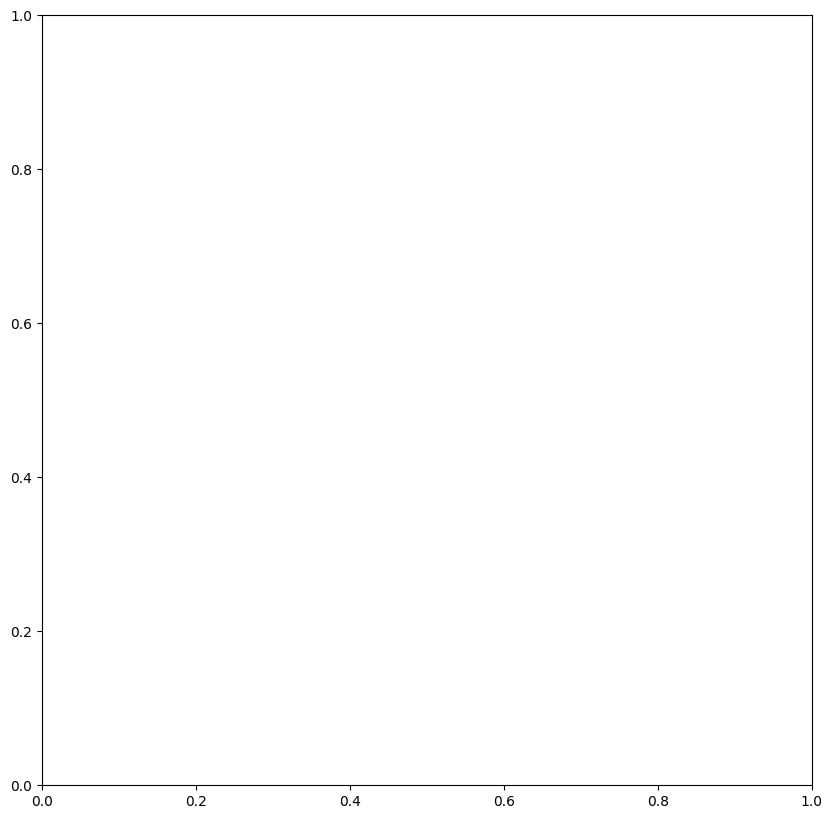

In [ ]:
# Visualizza alcune immagini del trainset
def show_images(images, n_rows=4):
    grid = make_grid(images, nrow=n_rows)
    plt.figure(figsize=(10, 10))

    grid = make_grid(images, nrow=n_rows)
    #grid_np = grid.permute(1, 2, 0).numpy()  # Converti il tensore in un array NumPy
    #grid_pil = Image.fromarray(np.uint8(grid_np * 255))

    plt.imshow(grid)
    plt.axis('off')
    plt.show()

# Carica il primo batch di immagini dal DataLoader di addestramento
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Visualizza le immagini
show_images(images)